## Gaudenzia Genoni, Matricola 245653
### Computational Social Science - Research Project  

# Latent Class Analysis of Socio-Economic and Political Dynamics in Italy Before and During the COVID-19 Pandemic  
  
     
     

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from adjustText import adjust_text
from matplotlib import rcParams

ESS9

In [5]:
file_path = 'ESS9.csv'
df9 = pd.read_csv(file_path, low_memory=False)
print(df9.shape)
df9.head()

(49519, 572)


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,domain,prob,stratum,psu
0,ESS9e03_2,9,3.2,23.11.2023,27,AT,0.581174,0.218111,0.302091,0.065890,...,2.0,12,2018,21.0,7.0,46.0,2.0,0.001176,59,1688
1,ESS9e03_2,9,3.2,23.11.2023,137,AT,1.062772,0.413473,0.302091,0.124907,...,19.0,12,2018,11.0,6.0,73.0,2.0,0.000643,79,88
2,ESS9e03_2,9,3.2,23.11.2023,194,AT,1.376509,2.270293,0.302091,0.685836,...,12.0,11,2018,20.0,48.0,92.0,2.0,0.000496,11,938
3,ESS9e03_2,9,3.2,23.11.2023,208,AT,0.993399,0.386483,0.302091,0.116753,...,26.0,11,2018,18.0,49.0,134.0,2.0,0.000688,74,1998
4,ESS9e03_2,9,3.2,23.11.2023,220,AT,0.377353,1.032102,0.302091,0.311789,...,5.0,12,2018,14.0,39.0,40.0,2.0,0.001811,99,601


In [114]:
df9[df9.inwyye==2020].inwmme.max()

1

In [113]:
df9[df9.inwyye==2018].inwmme.min()

8

In [6]:
it9=df9[df9.cntry=="IT"]
it9.reset_index(drop=True, inplace=True)
columns_all_nan = it9.columns[it9.isna().all()].tolist()
print('Number of NaN columns:', len(columns_all_nan), '\n')
it9 = it9.drop(columns=columns_all_nan)
print(it9.shape)
it9.head()

Number of NaN columns: 250 

(2745, 322)


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,domain,prob,stratum,psu
0,ESS9e03_2,9,3.2,23.11.2023,3,IT,1.019588,0.924885,1.909064,1.765664,...,28.0,2,2019,18.0,33.0,43.0,2.0,0.000103,2403,15837
1,ESS9e03_2,9,3.2,23.11.2023,13,IT,1.038898,0.954811,1.909064,1.822796,...,22.0,1,2019,16.0,11.0,64.0,2.0,0.000101,2422,15862
2,ESS9e03_2,9,3.2,23.11.2023,31,IT,1.050053,0.816516,1.909064,1.558781,...,7.0,3,2019,21.0,14.0,49.0,2.0,0.000100,2424,15384
3,ESS9e03_2,9,3.2,23.11.2023,58,IT,0.872215,0.986662,1.909064,1.883601,...,1.0,3,2019,11.0,57.0,61.0,2.0,0.000120,2399,15802
4,ESS9e03_2,9,3.2,23.11.2023,122,IT,1.019588,1.436108,1.909064,2.741621,...,2.0,1,2019,18.0,10.0,55.0,2.0,0.000103,2403,15826


ESS10

In [2]:
file_path = 'ESS10.csv'
df10 = pd.read_csv(file_path, low_memory=False)
print(df10.shape)
df10.head()

(37611, 618)


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS10e03_2,10,3.2,02.11.2023,10038,BE,0.882220,0.972276,0.718075,0.698167,...,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,36.0,1,1.0,0.000397,188,2596
1,ESS10e03_2,10,3.2,02.11.2023,10053,BE,1.047643,0.888635,0.718075,0.638107,...,2022-04-08 11:07:00,2022-04-08 11:10:00,2022-04-08 11:07:00,2022-04-08 11:10:00,54.0,2,2.0,0.000334,194,2206
2,ESS10e03_2,10,3.2,02.11.2023,10055,BE,1.087741,0.722811,0.718075,0.519033,...,2022-05-20 11:08:00,2022-05-20 11:10:00,2022-05-20 11:08:00,2022-05-20 11:10:00,77.0,1,2.0,0.000322,198,2114
3,ESS10e03_2,10,3.2,02.11.2023,10062,BE,0.909910,1.005565,0.718075,0.722072,...,2022-05-22 13:58:00,2022-05-22 13:59:00,2022-05-22 13:58:00,2022-05-22 13:59:00,55.0,1,1.0,0.000385,150,2645
4,ESS10e03_2,10,3.2,02.11.2023,10064,BE,0.918949,0.638705,0.718075,0.458639,...,2022-05-18 11:44:00,2022-05-18 11:45:00,2022-05-18 11:44:00,2022-05-18 11:45:00,55.0,1,1.0,0.000381,149,2313


In [3]:
df10['finish'] = pd.to_datetime(df10['jinwe'])

In [4]:
df10.finish.min()

Timestamp('2020-09-18 11:22:51')

In [103]:
df10.finish.max()

Timestamp('2022-09-02 19:21:00')

In [7]:
it10=df10[df10.cntry=="IT"]
it10.reset_index(drop=True, inplace=True)
columns_all_nan = it10.columns[it10.isna().all()].tolist()
print('Number of NaN columns:', len(columns_all_nan), '\n')
it10 = it10.drop(columns=columns_all_nan)
print(it10.shape)
it10.head()

Number of NaN columns: 176 

(2640, 443)


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu,finish
0,ESS10e03_2,10,3.2,02.11.2023,10019,IT,0.915684,0.895406,1.954533,1.750101,...,2022-01-25 15:06:18,2022-01-25 15:05:48,2022-01-25 15:06:46,13.0,1,2.0,0.000113,2133,14191,2022-01-25 15:06:46
1,ESS10e03_2,10,3.2,02.11.2023,10027,IT,0.933866,0.699457,1.954533,1.367112,...,2022-04-06 19:43:24,2022-04-06 19:42:31,2022-04-06 19:43:44,77.0,1,2.0,0.000111,2115,14131,2022-04-06 19:43:44
2,ESS10e03_2,10,3.2,02.11.2023,10038,IT,0.946146,0.426971,1.954533,0.834529,...,2022-03-10 12:14:21,2022-03-10 12:13:44,2022-03-10 12:14:45,44.0,1,2.0,0.000109,2114,14524,2022-03-10 12:14:45
3,ESS10e03_2,10,3.2,02.11.2023,10045,IT,0.890590,1.314276,1.954533,2.568796,...,2022-04-19 12:35:36,2022-04-19 12:35:19,2022-04-19 12:35:41,38.0,1,2.0,0.000116,2134,14303,2022-04-19 12:35:41
4,ESS10e03_2,10,3.2,02.11.2023,10053,IT,0.900479,1.272446,1.954533,2.487037,...,2022-01-28 10:30:17,2022-01-28 10:29:42,2022-01-28 10:30:34,53.0,2,2.0,0.000115,2116,14523,2022-01-28 10:30:34


Pre-processing

In [8]:
# Define the bins for age ranges and their corresponding labels
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50',
          '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90']

In [9]:
# Create a new column 'age_range' with the age categories
it9['age_range'] = pd.cut(it9['agea'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(it9[['agea', 'age_range']].head())

   agea age_range
0    38     36-40
1    17     16-20
2    28     26-30
3    29     26-30
4    45     41-45


In [10]:
# Create a new column 'age_range' with the age categories
it10['age_range'] = pd.cut(it10['agea'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(it10[['agea', 'age_range']].head())

   agea age_range
0    79     76-80
1    59     56-60
2    59     56-60
3    38     36-40
4    38     36-40


### Demographics

In [21]:
it_demo9 = it9[['domicil', 'region', 'gndr', 'age_range', 'trstplt']]
it_demo9.head()

,domicil,region,gndr,age_range,trstplt
0,4,ITF,2,36-40,4
1,4,ITH,1,16-20,88
2,3,ITH,1,26-30,5
3,4,ITI,2,26-30,5
4,4,ITF,1,41-45,0


In [12]:
it_demo = it10[['domicil', 'region', 'gndr', 'age_range', 'trstplt']]
it_demo.head()

,domicil,region,gndr,age_range,trstplt
0,2,ITH,2,76-80,1
1,4,ITC,2,56-60,0
2,3,ITG,1,56-60,0
3,3,ITH,1,36-40,1
4,1,ITG,1,36-40,3


Regions

In [22]:
region_counts9 = it_demo9.region.value_counts()

# Convert Series to DataFrame
region_counts9 = region_counts9.reset_index()
region_counts9.columns = ['region_code', 'count']
region_counts9

,region_code,count
0,ITC,727
1,ITF,628
2,ITH,593
3,ITI,523
4,ITG,274


In [23]:
region_counts = it_demo.region.value_counts()

# Convert Series to DataFrame
region_counts_df = region_counts.reset_index()
region_counts_df.columns = ['region_code', 'count']
region_counts_df

,region_code,count
0,ITC,668
1,ITF,637
2,ITH,596
3,ITI,440
4,ITG,299


In [24]:
region_to_group = {
    'Piemonte': 'ITC',
    'Valle d\'Aosta/Vallée d\'Aoste': 'ITC',
    'Lombardia': 'ITC',
    'Liguria': 'ITC',
    'Friuli-Venezia Giulia': 'ITH',
    'Emilia-Romagna': 'ITH',
    'Toscana': 'ITI',
    'Umbria': 'ITI',
    'Marche': 'ITI',
    'Lazio': 'ITI',
    'Abruzzo': 'ITF',
    'Molise': 'ITF',
    'Campania': 'ITF',
    'Puglia': 'ITF',
    'Basilicata': 'ITF',
    'Calabria': 'ITF',
    'Sicilia': 'ITG',
    'Sardegna': 'ITG',
    'Veneto': 'ITH',
    'Trentino-Alto Adige/Südtirol': 'ITH'
}

In [25]:
# Load the GeoJSON file from the URL
geojson_url = 'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson'
gdf = gpd.read_file(geojson_url)
gdf['region_code'] = gdf['reg_name'].map(region_to_group)
gdf

,reg_name,reg_istat_code_num,reg_istat_code,geometry,region_code
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",ITC
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",ITC
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",ITC
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",ITH
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",ITH
5,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",ITH
6,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",ITC
7,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",ITH
8,Toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",ITI
9,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",ITI


In [26]:
# Merge the GeoDataFrame with the interview DataFrame
merged9 = gdf.set_index('region_code').join(region_counts9.set_index('region_code'))
merged9 = merged9.reset_index()
merged9

,region_code,reg_name,reg_istat_code_num,reg_istat_code,geometry,count
0,ITC,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",727
1,ITC,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",727
2,ITC,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",727
3,ITC,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",727
4,ITF,Abruzzo,13,13,"MULTIPOLYGON (((13.94102 41.68797, 13.94048 41...",628
5,ITF,Molise,14,14,"POLYGON ((14.41933 41.43515, 14.41251 41.44122...",628
6,ITF,Campania,15,15,"MULTIPOLYGON (((14.12527 41.50737, 14.13202 41...",628
7,ITF,Puglia,16,16,"MULTIPOLYGON (((15.09831 41.39057, 15.09656 41...",628
8,ITF,Basilicata,17,17,"MULTIPOLYGON (((15.46575 40.63359, 15.46593 40...",628
9,ITF,Calabria,18,18,"MULTIPOLYGON (((15.97395 39.46742, 15.97243 39...",628


In [27]:
# Merge the GeoDataFrame with the interview DataFrame
merged = gdf.set_index('region_code').join(region_counts_df.set_index('region_code'))
merged = merged.reset_index()
merged

,region_code,reg_name,reg_istat_code_num,reg_istat_code,geometry,count
0,ITC,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",668
1,ITC,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",668
2,ITC,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",668
3,ITC,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",668
4,ITF,Abruzzo,13,13,"MULTIPOLYGON (((13.94102 41.68797, 13.94048 41...",637
5,ITF,Molise,14,14,"POLYGON ((14.41933 41.43515, 14.41251 41.44122...",637
6,ITF,Campania,15,15,"MULTIPOLYGON (((14.12527 41.50737, 14.13202 41...",637
7,ITF,Puglia,16,16,"MULTIPOLYGON (((15.09831 41.39057, 15.09656 41...",637
8,ITF,Basilicata,17,17,"MULTIPOLYGON (((15.46575 40.63359, 15.46593 40...",637
9,ITF,Calabria,18,18,"MULTIPOLYGON (((15.97395 39.46742, 15.97243 39...",637


c:\Users\prova\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
c:\Users\prova\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
C:\Users\prova\AppData\Local\Temp\ipykernel_10244\55713186.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


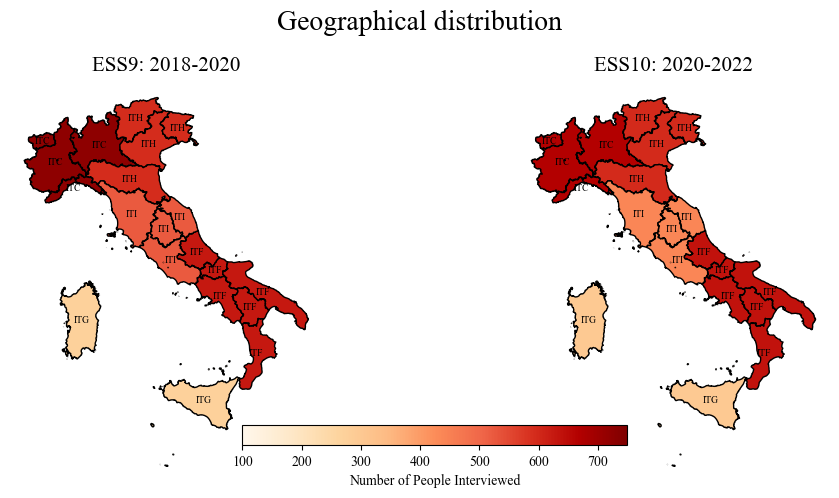

In [28]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first choropleth map
merged9.plot(column='count', ax=ax1, legend=False,
             cmap='OrRd', edgecolor='black',
             vmin=100, vmax=750)  # Set the range for the color scale

# Add region codes as text annotations for the first map
for idx, row in merged9.iterrows():
    centroid = row['geometry'].centroid
    ax1.text(centroid.x, centroid.y, row['region_code'],
             fontsize=7, ha='center', va='center')

ax1.set_title('ESS9: 2018-2020', fontdict={'fontsize': '15', 'fontweight': '3'})
ax1.set_axis_off()

# Plot the second choropleth map
merged.plot(column='count', ax=ax2, legend=False,
            cmap='OrRd', edgecolor='black',
            vmin=100, vmax=750)  # Set the range for the color scale

# Add region codes as text annotations for the second map
for idx, row in merged.iterrows():
    centroid = row['geometry'].centroid
    ax2.text(centroid.x, centroid.y, row['region_code'],
             fontsize=7, ha='center', va='center')

ax2.set_title('ESS10: 2020-2022', fontdict={'fontsize': '15', 'fontweight': '3'})
ax2.set_axis_off()

# Add a shared color legend
# Create a color map for the legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=100, vmax=750))
sm.set_array([])

# Add the colorbar as the legend
cbar = plt.colorbar(sm, ax=[ax1, ax2], orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Number of People Interviewed')

# Set a general title for the entire figure
fig.suptitle('Geographical distribution', fontsize=20)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Italy_map.png', format='png')

plt.show()

Age range

In [13]:
# Define custom order for age ranges
age_range_order = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
                   '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90']

In [14]:
age_range9 = it_demo9.age_range.value_counts()
age_range9 = age_range9.reset_index()
age_range9.columns = ["age_range", "count"]

# Convert 'age_range' to categorical type with the specified order
age_range9['age_range'] = pd.Categorical(age_range9['age_range'], categories=age_range_order, ordered=True)

# Sort DataFrame by 'age_range'
age_range9 = age_range9.sort_values(by='age_range').reset_index(drop=True)
age_range9

,age_range,count
0,16-20,173
1,21-25,179
2,26-30,163
3,31-35,151
4,36-40,178
5,41-45,219
6,46-50,236
7,51-55,253
8,56-60,223
9,61-65,205


In [15]:
age_range = it_demo.age_range.value_counts()
age_range = age_range.reset_index()
age_range.columns = ["age_range", "count"]

# Convert 'age_range' to categorical type with the specified order
age_range['age_range'] = pd.Categorical(age_range['age_range'], categories=age_range_order, ordered=True)

# Sort DataFrame by 'age_range'
age_range = age_range.sort_values(by='age_range').reset_index(drop=True)
age_range

,age_range,count
0,16-20,133
1,21-25,169
2,26-30,143
3,31-35,156
4,36-40,168
5,41-45,181
6,46-50,237
7,51-55,239
8,56-60,248
9,61-65,252


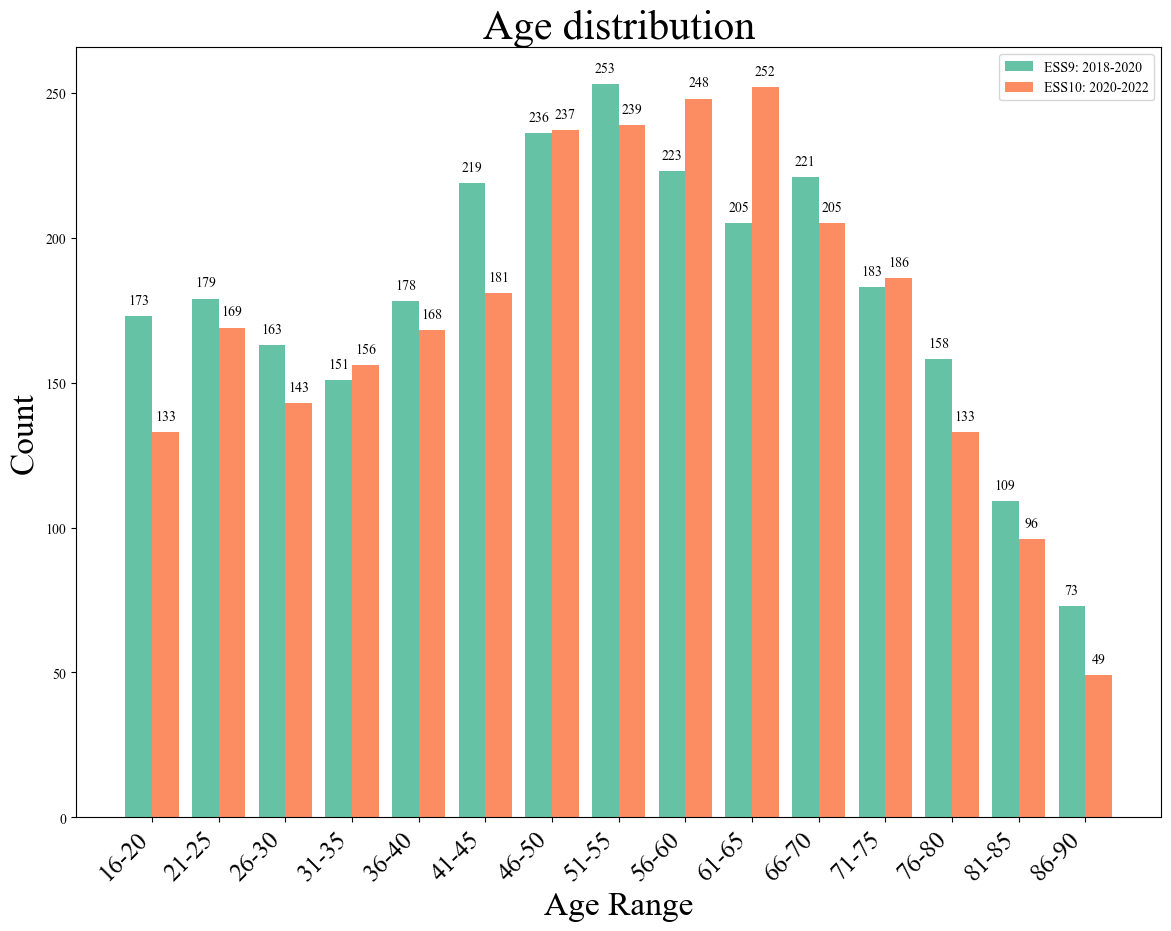

In [16]:
# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Ensure both dataframes have the same age ranges
age_ranges = np.arange(len(age_range9))  # This will be used to position the bars

# Width of a single bar
bar_width = 0.4

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust size as needed

# Plot bars for age_range9
bars1 = ax.bar(age_ranges - bar_width / 2, age_range9['count'], bar_width, color='#66c2a5', label='ESS9: 2018-2020')

# Plot bars for age_range
bars2 = ax.bar(age_ranges + bar_width / 2, age_range['count'], bar_width, color='#fc8d62', label='ESS10: 2020-2022')

# Add labels on top of each bar
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f'{height}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f'{height}', ha='center', va='bottom')

# Customize plot
ax.set_xlabel('Age Range', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
ax.set_title('Age distribution', fontsize=30)
ax.set_xticks(age_ranges)  # Set x-ticks to be in the middle of grouped bars
ax.set_xticklabels(age_range9['age_range'], rotation=45, ha='right', fontsize=18)  # Rotate labels for readability
ax.legend()

# Save the plot as a PNG file
plt.savefig('age_distribution.png', format='png')

# Show plot
plt.show()

Gender

In [17]:
it_demo.gndr.value_counts()

gndr
2    1386
1    1254
Name: count, dtype: int64

In [18]:
it_demo9.gndr.value_counts()

gndr
2    1447
1    1298
Name: count, dtype: int64

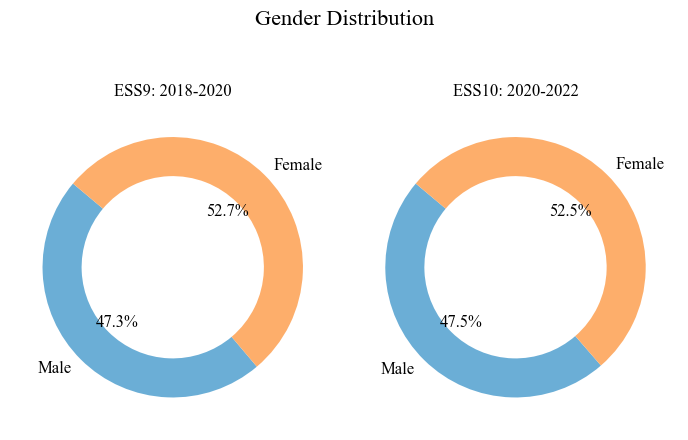

In [19]:
# Data
labels = ['Male', 'Female']
sizes9 = [1298, 1447]  # Corresponding counts for each category
sizes10 = [1254, 1386]
colors = ['#6baed6', '#fdae6b']  # Define colors for the categories

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5))  # Create two subplots side by side

# Plot the first pie chart
ax1.pie(sizes9, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})
ax1.set_title('ESS9: 2018-2020')

# Plot the second pie chart
ax2.pie(sizes10, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})
ax2.set_title('ESS10: 2020-2022')

# Set a general title for the entire figure
fig.suptitle('Gender Distribution', fontsize=16)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('gender_distribution.png', format='png')

# Show plot
plt.show()

Trust in politicians

In [176]:
non_response_codes = [77, 88, 99]

# Calculate percentage of non-response values
total_observations = len(it_demo9)
non_response_count = it_demo9['trstplt'].isin(non_response_codes).sum()
non_response_percentage = (non_response_count / total_observations) * 100

print(f"Percentage of non-response answers: {non_response_percentage:.2f}%")

# Remove non-response values from the dataset
it_demo_clean = it_demo9[~it_demo9['trstplt'].isin(non_response_codes)]

# Calculate the distribution of trust levels
trust_counts = it_demo_clean['trstplt'].value_counts(normalize=True).sort_index() * 100

trust_counts

Percentage of non-response answers: 2.88%


trstplt
0     21.417854
1      9.864966
2     11.702926
3     13.915979
4     12.865716
5     14.778695
6      8.552138
7      4.088522
8      1.687922
9      0.750188
10     0.375094
Name: proportion, dtype: float64

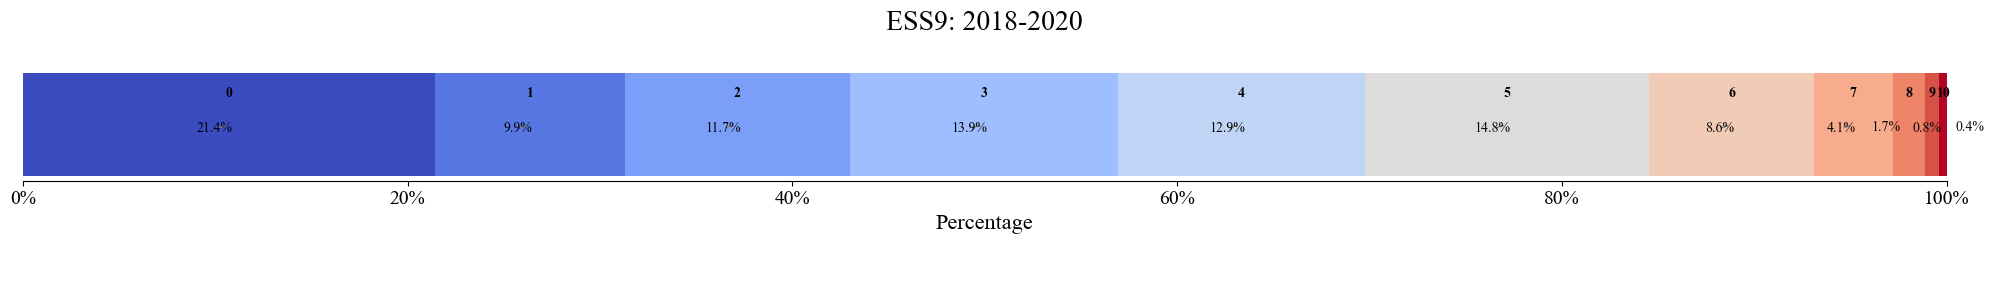

In [30]:
# Data
data = [21.417854, 9.864966, 11.702926, 13.915979, 12.865716, 
        14.778695, 8.552138, 4.088522, 1.687922, 0.750188, 0.375094]
trstplt9 = pd.DataFrame(data, columns=['proportion'])

# Plot
fig, ax = plt.subplots(figsize=(20, 3))  # Adjusted dimensions

# Create a cumulative sum to stack the bars
trstplt9['cumulative'] = trstplt9['proportion'].cumsum()

# Define a custom colormap: coolwarm
colors = plt.cm.coolwarm(np.linspace(0, 1, len(trstplt9)))

# List to store text objects
texts = []

# Plot each segment
for i, proportion in enumerate(trstplt9['proportion']):
    left_position = trstplt9['cumulative'].iloc[i] - proportion
    ax.barh(0, proportion, left=left_position, height=0.5, color=colors[i])
    
    # Add percentage labels inside the bar segments
    text_position = left_position + proportion / 2
    texts.append(ax.text(text_position, 0, f'{proportion:.1f}%', ha='center', va='center', color='black', fontsize=10))
    
    # Add segment value labels at the top of each bar
    ax.text(trstplt9['cumulative'].iloc[i] - proportion / 2, 0.15, f'{i}', ha='center', va='center', color='black', fontsize=10, weight='bold')

# Adjust text to avoid overlap
adjust_text(texts, only_move={'points': 'bbox', 'text': 'bbox'}, arrowprops=dict(arrowstyle='->', color='grey'))

# Customize plot
ax.set_yticks([])
ax.set_xlabel('Percentage\n\n', fontsize=16)
ax.set_title('ESS9: 2018-2020\n', fontsize=20)

# Add percentage signs to the x-axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Customize tick parameters
ax.tick_params(axis='x', labelsize=14)  # Adjust the label size for x-axis ticks


# Hide all spines except the bottom
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

# Set x-axis limits to ensure the bar ends exactly at 100%
ax.set_xlim(0, 100)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('trust_politician.png', format='png', dpi=300)

# Show the plot
plt.show()

In [177]:
non_response_codes = [77, 88, 99]

# Calculate percentage of non-response values
total_observations = len(it_demo)
non_response_count = it_demo['trstplt'].isin(non_response_codes).sum()
non_response_percentage = (non_response_count / total_observations) * 100

print(f"Percentage of non-response answers: {non_response_percentage:.2f}%")

# Remove non-response values from the dataset
it_demo_clean = it_demo[~it_demo['trstplt'].isin(non_response_codes)]

# Calculate the distribution of trust levels
trust_counts = it_demo_clean['trstplt'].value_counts(normalize=True).sort_index() * 100

trust_counts

Percentage of non-response answers: 1.10%


trstplt
0     18.192264
1      9.000383
2     13.711222
3     12.830333
4     14.362313
5     14.132516
6     10.800460
7      4.595940
8      1.570280
9      0.497894
10     0.306396
Name: proportion, dtype: float64

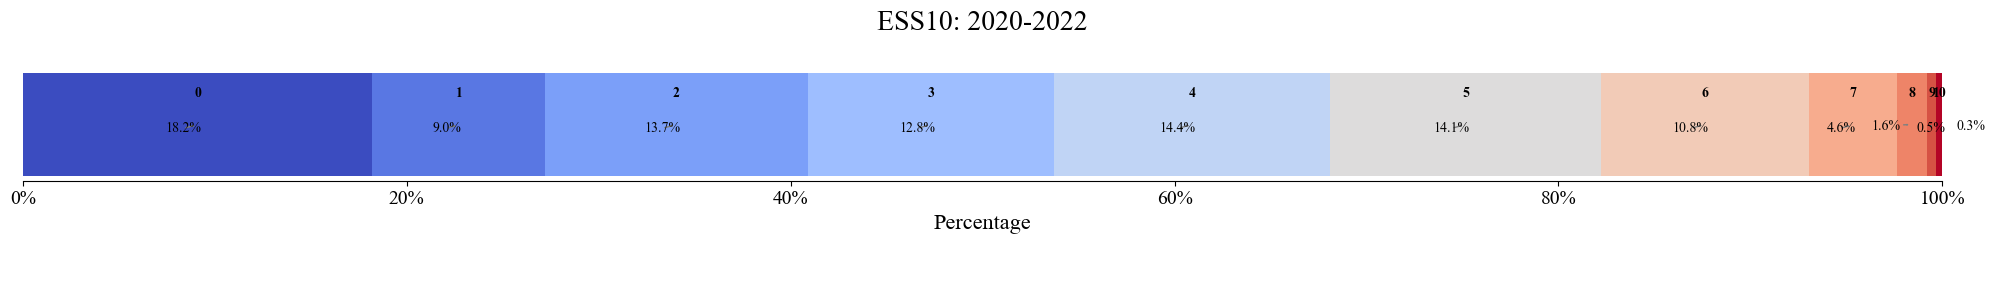

In [31]:
# Data
# Data for trstplt
data = [18.192264, 9.000383, 13.711222, 12.830333, 14.362313, 
        14.132516, 10.800460, 4.595940, 1.570280, 0.497894, 0.306396]
trstplt = pd.DataFrame(data, columns=['proportion'])
trstplt['cumulative'] = trstplt['proportion'].cumsum()


# Plot
fig, ax = plt.subplots(figsize=(20, 3))  # Adjusted dimensions

# Create a cumulative sum to stack the bars
trstplt['cumulative'] = trstplt['proportion'].cumsum()

# Define a custom colormap: coolwarm
colors = plt.cm.coolwarm(np.linspace(0, 1, len(trstplt)))

# List to store text objects
texts = []

# Plot each segment
for i, proportion in enumerate(trstplt['proportion']):
    left_position = trstplt['cumulative'].iloc[i] - proportion
    ax.barh(0, proportion, left=left_position, height=0.5, color=colors[i])
    
    # Add percentage labels inside the bar segments
    text_position = left_position + proportion / 2
    texts.append(ax.text(text_position, 0, f'{proportion:.1f}%', ha='center', va='center', color='black', fontsize=10))
    
    # Add segment value labels at the bottom of each bar
    ax.text(trstplt['cumulative'].iloc[i] - proportion / 2, 0.15, f'{i}', ha='center', va='center', color='black', fontsize=10, weight='bold')

# Adjust text to avoid overlap
adjust_text(texts, only_move={'points': 'bbox', 'text': 'bbox'}, arrowprops=dict(arrowstyle='->', color='grey'))

# Customize plot
ax.set_yticks([])
ax.set_xlabel('Percentage\n\n', fontsize=16)
ax.set_title('ESS10: 2020-2022\n',  fontsize=20)

# Add percentage signs to the x-axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
# Customize tick parameters
ax.tick_params(axis='x', labelsize=14)  # Adjust the label size for x-axis ticks

# Hide all spines except the bottom
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

# Set x-axis limits to ensure the bar ends exactly at 100%
ax.set_xlim(0, 100)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('trust_politician2.png', format='png', dpi=300)

# Show the plot
plt.show()

#### Dataset for Latent Class Analysis

In [116]:
it_LCA9 = it9[['edlveit', 'hincfel', 'stflife', 'lrscale', 'vote', 'trstplt', 'psppsgva', 'polintr']]
it_LCA9.to_csv('it_LCA9.csv', index=False) 
it_LCA9.head()

,edlveit,hincfel,stflife,lrscale,vote,trstplt,psppsgva,polintr
0,9.0,2,8,88,1,4,1,3
1,4.0,2,77,8,3,88,4,3
2,12.0,1,8,7,1,5,2,2
3,12.0,1,8,2,1,5,2,2
4,4.0,2,7,88,1,0,3,2


In [117]:
it_LCA10 = it10[['edlveit', 'hincfel', 'stflife', 'lrscale', 'vote', 'trstplt', 'psppsgva', 'polintr']]
it_LCA10.to_csv('it_LCA10.csv', index=False) 
it_LCA10.head()

,edlveit,hincfel,stflife,lrscale,vote,trstplt,psppsgva,polintr
0,2.0,2,7,77,1,1,1,3
1,12.0,2,6,5,1,0,1,3
2,11.0,3,8,8,1,0,1,3
3,4.0,2,5,6,1,1,1,3
4,4.0,3,10,88,2,3,1,4
